In [11]:
import plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../time_series_covid19_deaths_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7665,7667,7670,7670,7671,7671,7671,7671,7671,7671
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3492
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 811 entries, Province/State to 4/7/22
dtypes: float64(2), int64(807), object(2)
memory usage: 1.8+ MB


In [14]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/22,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22
count,282.000000,282.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,20.106368,21.958718,0.059859,0.063380,0.091549,0.147887,0.197183,0.288732,0.461268,0.468310,...,21596.169014,21613.908451,21630.799296,21646.735915,21656.105634,21661.890845,21672.193662,21686.313380,21713.063380,21727.820423
std,25.841453,75.893366,1.008764,1.010299,1.426181,2.374622,3.087051,4.510813,7.417526,7.418036,...,85544.553818,85611.377601,85653.235226,85704.502195,85724.560180,85733.238932,85764.095484,85803.043476,85886.482494,85935.199389
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.750000,40.250000,41.000000,41.000000,41.000000,41.000000,41.750000,41.750000,41.750000,41.750000
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000,816.500000
75%,40.950592,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7790.750000,7821.500000,7911.250000,8001.250000,8088.250000,8170.500000,8194.500000,8210.750000,8210.750000,8212.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,978909.000000,980130.000000,980638.000000,981450.000000,981612.000000,981644.000000,982099.000000,982576.000000,983817.000000,984571.000000


In [15]:
covid_df_last_week_columns =df.iloc[:,-8:].columns.to_list() 
covid_df_last_week_by_countries = df.iloc[:,[1]+[*range(-8,0,1)]] 
top=covid_df_last_week_by_countries.nlargest(n=10, columns=['3/31/22'])
print(top)


     Country/Region  3/31/22  4/1/22  4/2/22  4/3/22  4/4/22  4/5/22  4/6/22  \
256              US   980638  981450  981612  981644  982099  982576  983817   
31           Brazil   660022  660265  660371  660410  660570  660786  660980   
148           India   521181  521264  521345  521358  521416  521487  521530   
218          Russia   361348  361679  362008  362304  362581  362890  363175   
184          Mexico   323016  323127  323212  323223  323235  323318  323403   
212            Peru   212207  212256  212299  212328  212354  212372  212396   
273  United Kingdom   165379  165570  165570  165570  165780  166148  169095   
154           Italy   159383  159537  159666  159784  159909  160103  160253   
149       Indonesia   155089  155164  155164  155164  155164  155421  155464   
150            Iran   140204  140240  140277  140315  140368  140407  140451   

     4/7/22  
256  984571  
31   661228  
148  521573  
218  363455  
184  323508  
212  212420  
273  169412  
154  16

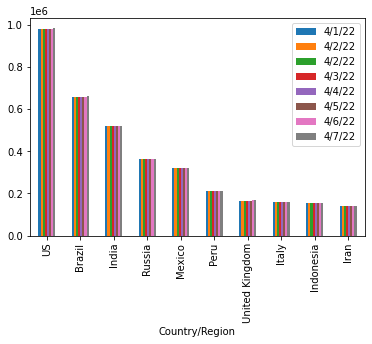

In [16]:
top.plot(x="Country/Region", y=["4/1/22", "4/2/22","4/2/22","4/3/22","4/4/22","4/5/22","4/6/22","4/7/22"], kind="bar")